In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv("../../Excel Files/mushrooms.csv")

In [3]:
X= pd.get_dummies(df.drop("class",axis=1),drop_first=True)
y = df["class"]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=101)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
paramGrid = {"n_estimators":[50,100],
             "learning_rate":[0.1,0.05,0.2],
             "max_depth":[3,4,5]}

In [8]:
gbModel = GradientBoostingClassifier()

In [9]:
gridModel = GridSearchCV(gbModel,paramGrid)

In [10]:
gridModel.fit(X_train,y_train)

,estimator,GradientBoostingClassifier()
,param_grid,"{'learning_rate': [0.1, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


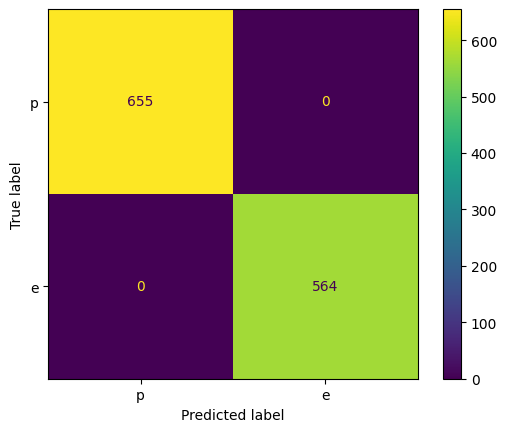

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [11]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
yPredictions = gridModel.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,yPredictions),display_labels=y.unique()).plot(cmap="viridis")
plt.show()
print(classification_report(y_test,yPredictions))

In [13]:

featImp = pd.DataFrame({"Features":X.columns,"Importance":gridModel.best_estimator_.feature_importances_})

In [18]:
featImp.sort_values(by="Importance")
impFeat = featImp[featImp["Importance"]>0.0005]
impFeat

,Features,Importance
5,cap-surface_g,0.001049
16,cap-color_y,0.002311
17,bruises_t,0.051942
19,odor_f,0.013929
20,odor_l,0.018250
22,odor_n,0.614744
23,odor_p,0.000921
27,gill-spacing_w,0.012509
28,gill-size_n,0.010553
42,stalk-root_c,0.135970


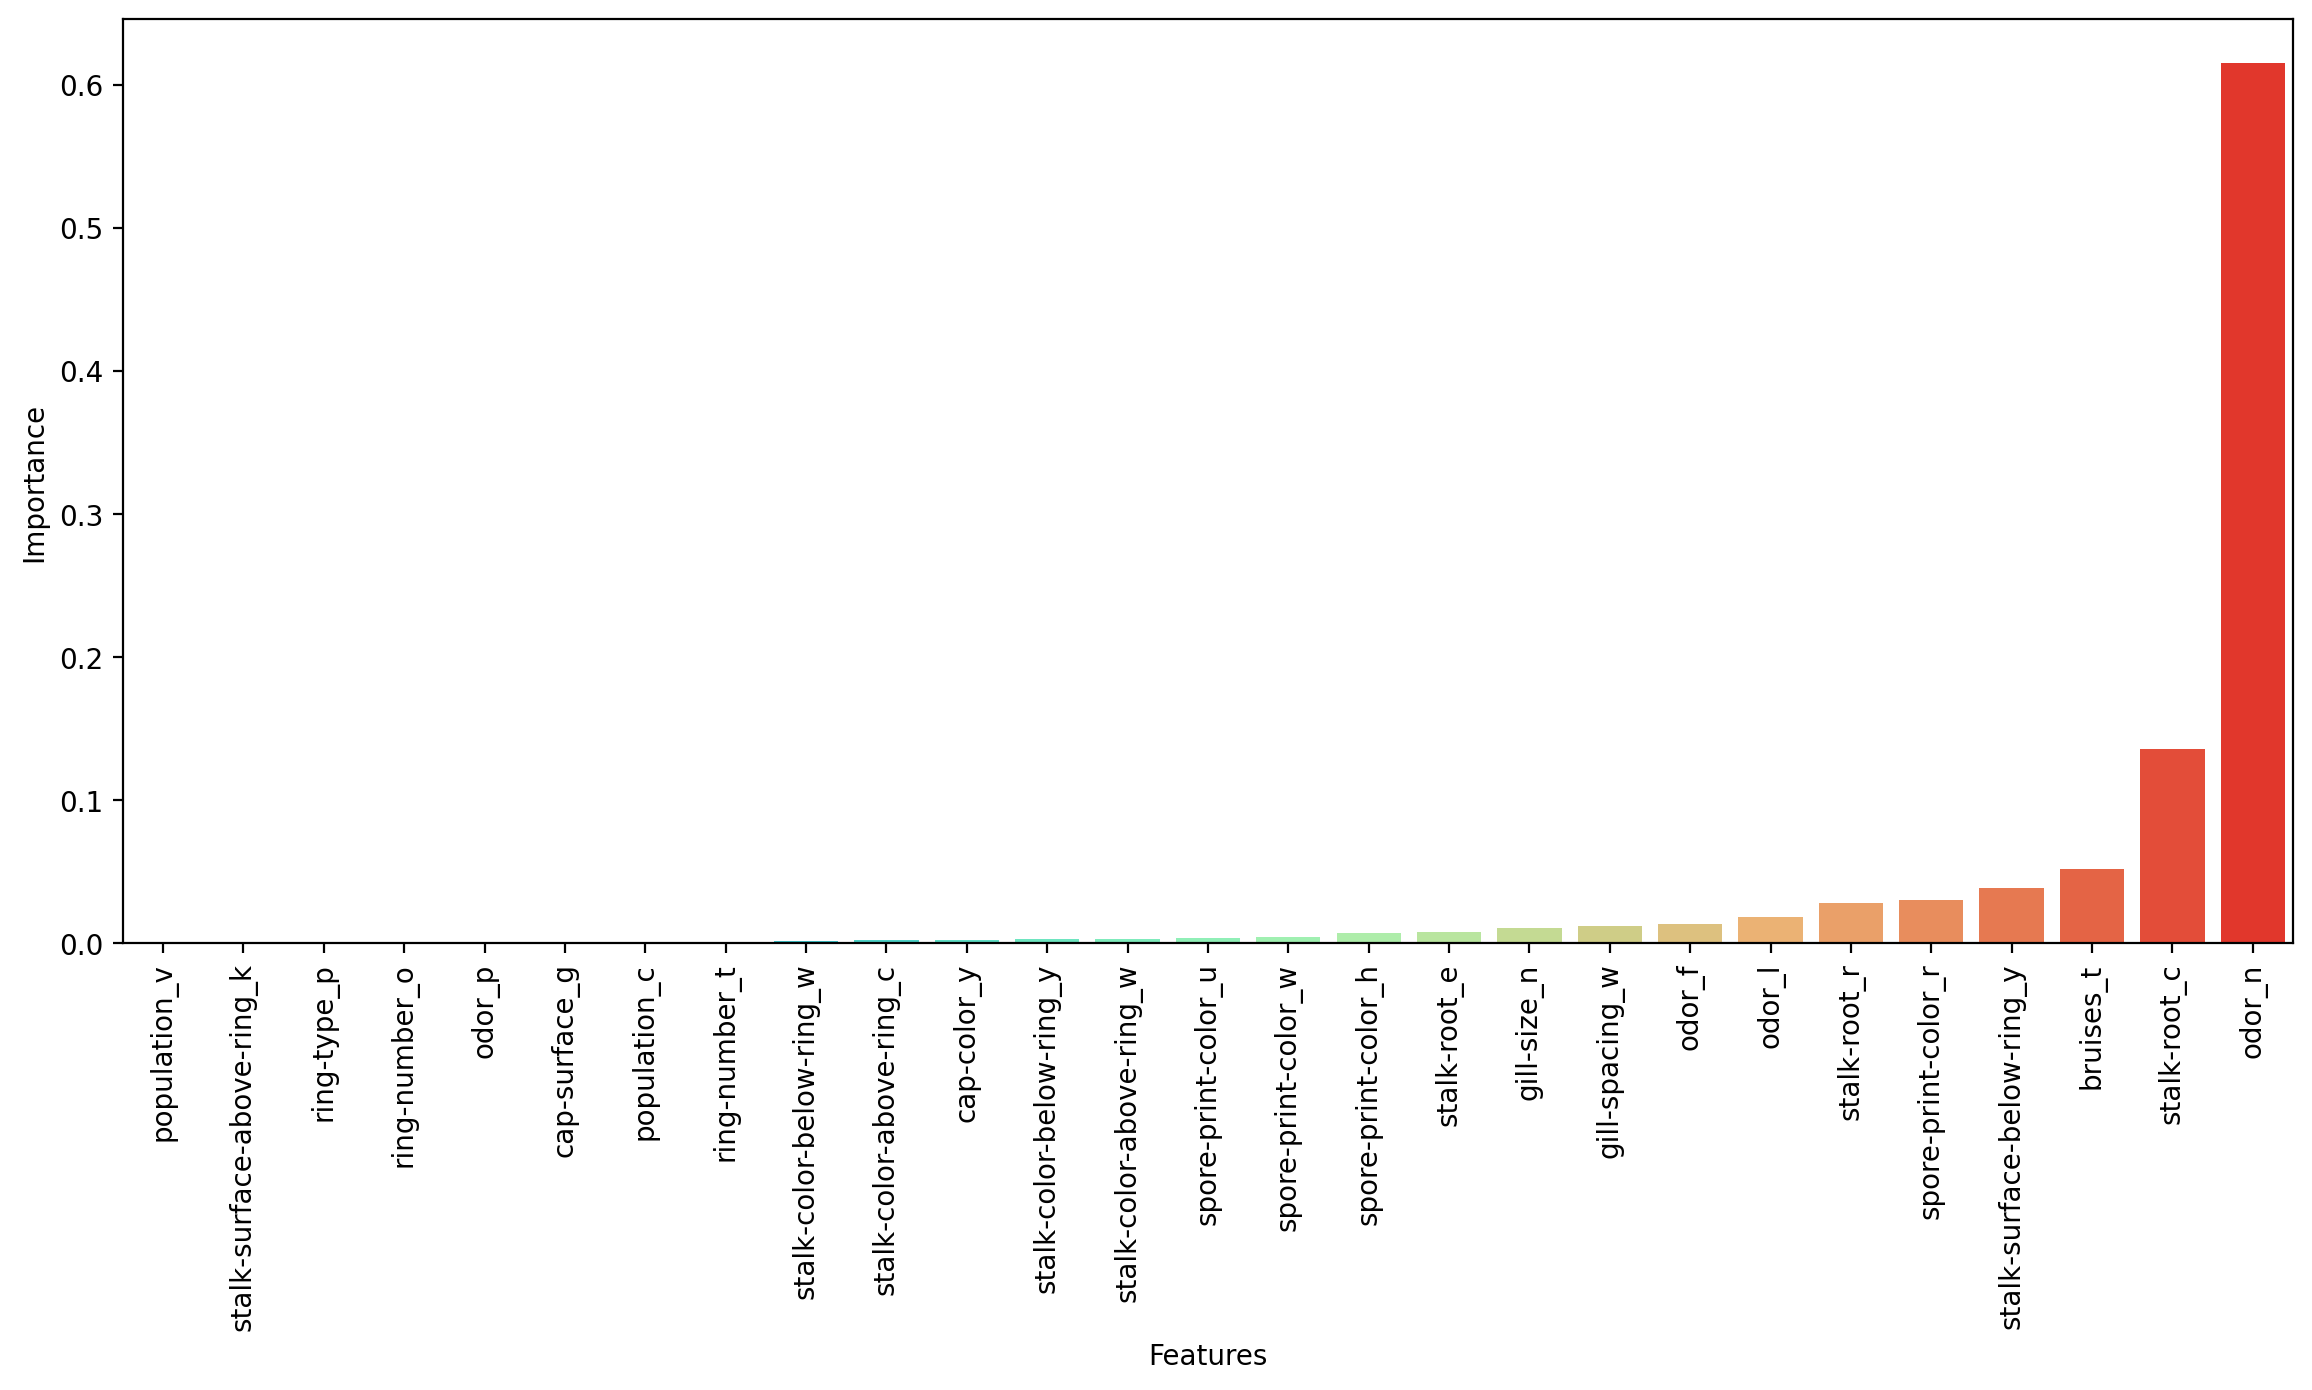

In [20]:
impFeat = impFeat.sort_values(by="Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(x="Features",y="Importance",data=impFeat,hue="Features",palette="rainbow")
plt.xticks(rotation=90)
plt.show()